In [3]:
import pandas as pd
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

from nltk.corpus import stopwords # import packge

news = pd.read_csv('finalInput.csv')
news.head()


,Unnamed: 0,NewsContent,author,publishedDate,title,AAPL_company,IBM_company,GOOGL_company,AMZN_company,MSFT_company,AAPL_senti,IBM_senti,GOOGL_senti,AMZN_senti,MSFT_senti
0,0,"MILAN/ROME, March 27 (Reuters) - Italian stat...",NaN,"March 27, 2019, 01:22:00 PM EDT",Italian state lender seeks to broker truce bet...,0,0,0,0,0,0,0,0,0,0
1,1,April 5 (Reuters) - Representatives of Venezu...,NaN,"April 05, 2019, 06:23:00 PM EDT",Lawyers for Venezuela's Guaido ask U.S. court ...,0,0,0,0,0,0,0,0,0,0
2,2,By Tatiana Bautzer and Gram Slattery SAO PAUL...,NaN,"April 05, 2019, 05:49:00 PM EDT",Petrobras agrees to sell pipeline unit to Engi...,0,0,0,0,0,0,0,0,0,0
3,3,Top Tech Stocks MSFT -1.59% AAPL +0.61% IBM -0...,MT Newswires,"March 27, 2019, 01:18:46 PM EDT","Technology Sector Update for 03/27/2019: NTWK,...",1,0,1,0,1,1,0,-1,0,-1
4,4,By Tatiana Bautzer and Gram Slattery SAO PAUL...,NaN,"April 05, 2019, 05:49:00 PM EDT",Engie bids $8.6 bln for Petrobras pipeline uni...,0,0,0,0,0,0,0,0,0,0


In [47]:
newsdocument = news['NewsContent']
newsdocument = str(';'.join(newsdocument))
newsToken = nltk.word_tokenize(newsdocument) # tokenize
# function of ngrams
def ngrams(documentTokens,ngram): # document; ngrams=#grams
    i = 0 
    resultngrams = []
    lowerwords = [w.lower() for w in documentTokens]
    lowerwords = [w for w in documentTokens if w.isalpha()]
        
    stop_words = list(stopwords.words("english"))
    newStopWords = ["AAPL","IBM","GOOG","AMZN","MSFT","share","shares","stocks","news","stock","loss","per"]
    stop_words.extend(newStopWords)
    words_nostopwords = [w for w in lowerwords if w not in stop_words]
    
    for n in words_nostopwords:
        resultngrams.append(words_nostopwords[i:i+ngram])
        i += 1
    ngramList = []
    for h in range(0,len(resultngrams)):
        a = ' '.join(resultngrams[h])
        ngramList.append(a) 
    return ngramList

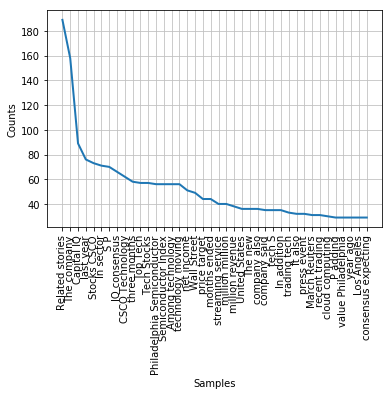

In [50]:
# Ngrams to find Recent News Topic
bigrams = list(ngrams(newsToken,2))
#bigrams # len = 61958
FreqDist(bigrams).plot(40)

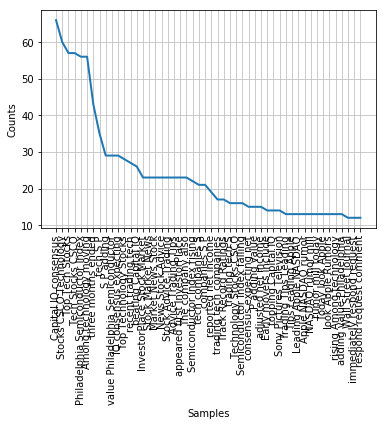

In [52]:
trigrams = list(ngrams(newsToken,3))
FreqDist(trigrams).plot(50)

In [68]:
# write to csv of bigrams in news to generate recent hot topics
Freq_bigrams = FreqDist(bigrams)
#pd.DataFrame(FreqDist(bigrams))
sorted_bigrams = sorted(Freq_bigrams.items(),key = lambda k: k[1], reverse = True)
pd.DataFrame(sorted_bigrams).to_csv('news_bigrams.csv')

In [53]:
# write to csv of trigrams in news to generate recent hot topics
Freq_trigrams = FreqDist(trigrams)
sorted_trigrams = sorted(Freq_trigrams.items(),key = lambda k: k[1], reverse = True)
pd.DataFrame(sorted_trigrams).to_csv('news_trigrams.csv')

In [ ]:
# use POS tagging to find proper noun of company name


In [55]:
POS_Tags= nltk.pos_tag(newsToken)